# Customer Segmentation using K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

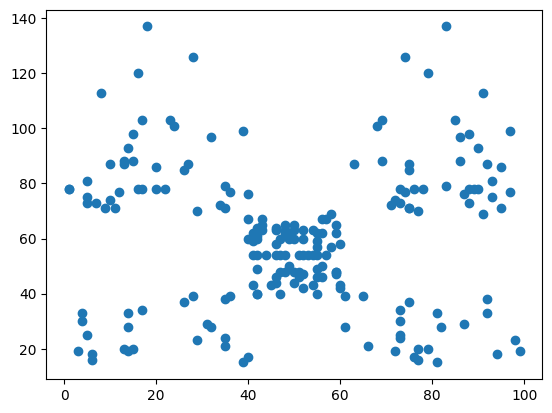

In [6]:
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.show()

In [13]:
wcss=[]

for k in range(1,10):
    model=KMeans(n_clusters=k,init='k-means++',random_state=42)
    model.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    wcss.append(model.inertia_)

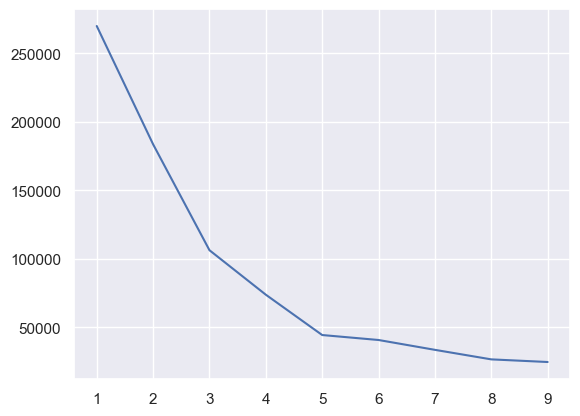

In [16]:
# sns.set()
plt.plot(range(1,10),wcss)
plt.show()

### Optimum number of clusters is 5

In [17]:
kmodel=KMeans(n_clusters=5)

In [18]:
y=kmodel.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])
df['cluster']=y

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


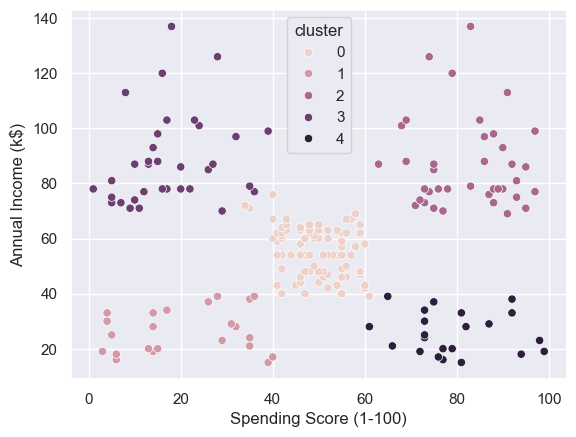

In [20]:

sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Annual Income (k$)'],data=df,hue=df['cluster'])
plt.show()